### Bike Sharing Demand

- 대회 URL https://www.kaggle.com/c/bike-sharing-demand

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

train = pd.read_csv("./bike_data/train.csv", parse_dates=['datetime'])
test = pd.read_csv("./bike_data/test.csv", parse_dates=['datetime'])
sub = pd.read_csv("./bike_data/sampleSubmission.csv")

train.shape, test.shape, sub.shape

((10886, 12), (6493, 9), (6493, 2))

In [11]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [16]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [20]:
train['datetime'].describe()

C:\Users\AI02\AppData\Local\Temp\ipykernel_18300\3679864263.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train['datetime'].describe()


count                   10886
unique                  10886
top       2011-01-01 00:00:00
freq                        1
first     2011-01-01 00:00:00
last      2012-12-19 23:00:00
Name: datetime, dtype: object

In [22]:
test['datetime'].min(), test['datetime'].max()

(Timestamp('2011-01-20 00:00:00'), Timestamp('2012-12-31 23:00:00'))

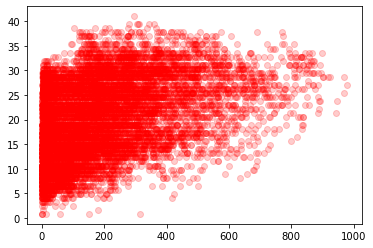

In [28]:
plt.scatter(train['count'], train['temp'], c = 'red', alpha = 0.2)

(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

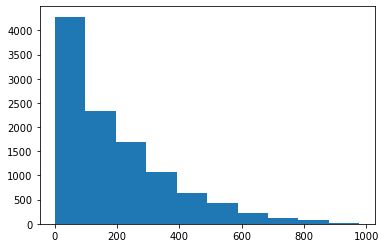

In [30]:
plt.hist(train['count']) # 분포 확인

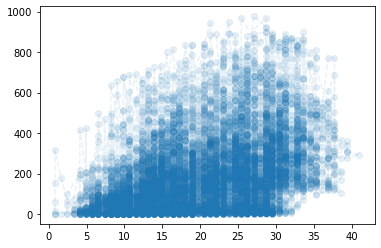

In [32]:
plt.plot(train['temp'], train['count'], '--o', alpha=0.1)

In [33]:
train.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

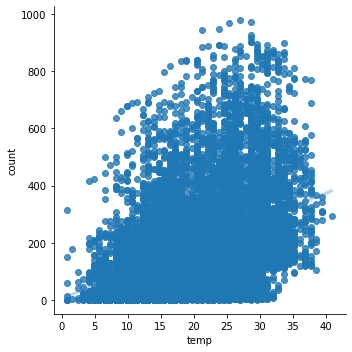

In [38]:
sns.lmplot(x="temp", y="count", data=train, line_kws={"alpha":0.2})

In [39]:
train['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [40]:
test['weather'].value_counts()

1    4221
2    1710
3     560
4       2
Name: weather, dtype: int64

(array([1.313e+03, 4.083e+03, 2.827e+03, 1.540e+03, 6.960e+02, 2.800e+02,
        1.070e+02, 3.100e+01, 6.000e+00, 3.000e+00]),
 array([ 0.     ,  5.69969, 11.39938, 17.09907, 22.79876, 28.49845,
        34.19814, 39.89783, 45.59752, 51.29721, 56.9969 ]),
 <BarContainer object of 10 artists>)

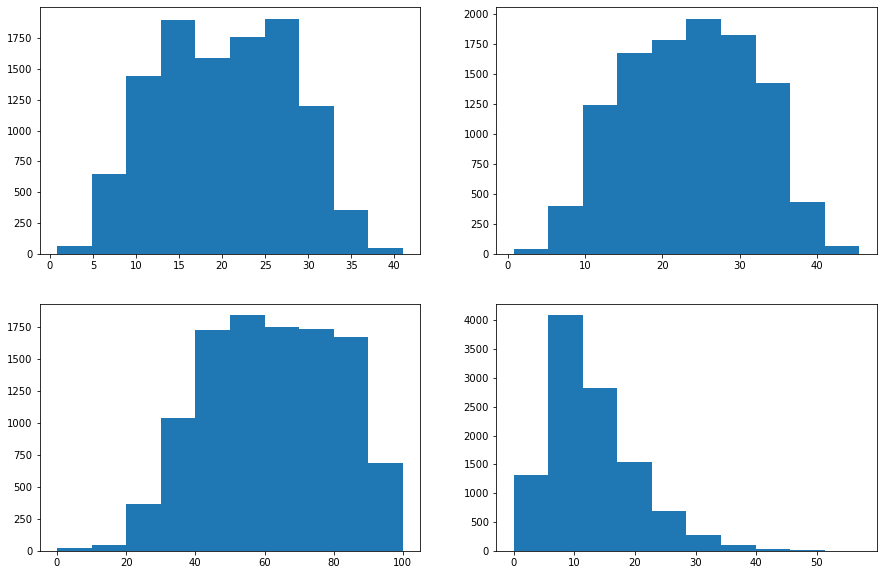

In [41]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(train.temp)

plt.subplot(2,2,2)
plt.hist(train.atemp)

plt.subplot(2,2,3)
plt.hist(train.humidity)

plt.subplot(2,2,4)
plt.hist(train.windspeed)

In [43]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

Text(0.5, 0.98, '피처의 값의 분포')

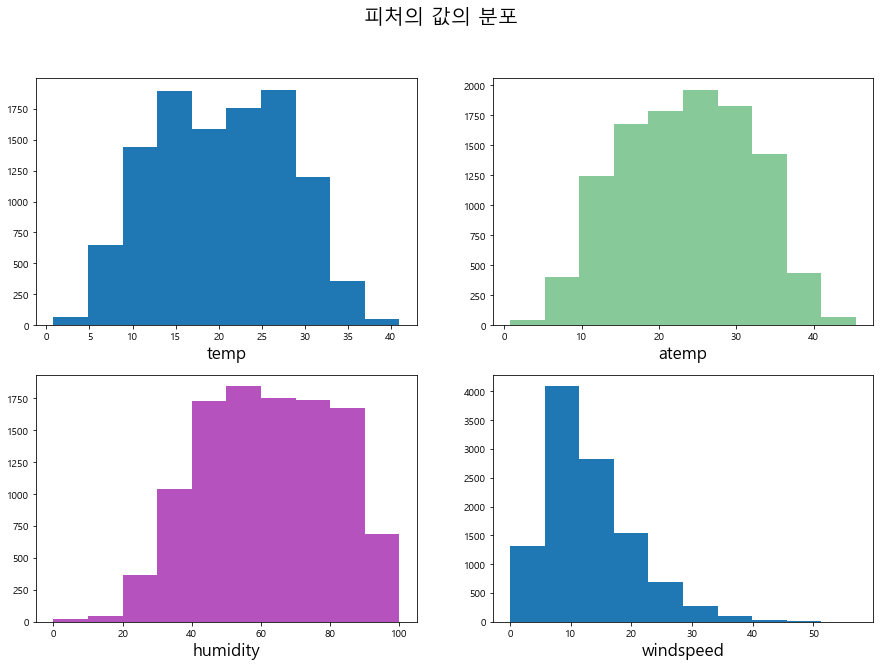

In [44]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(train.temp)
plt.xlabel("temp", size=17)

plt.subplot(2,2,2)
plt.hist(train.atemp, color="#88c999")
plt.xlabel("atemp", size=17)

plt.subplot(2,2,3)
plt.hist(train.humidity, color='#B652BE')
plt.xlabel("humidity", size=17)

plt.subplot(2,2,4)
plt.hist(train.windspeed)
plt.xlabel("windspeed", size=17)

plt.suptitle("피처의 값의 분포", size=20)

In [47]:
print( train['weather'].count() )
all_cnt = train['weather'].count()
print( train['weather'].value_counts() / all_cnt )

10886
1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: weather, dtype: float64


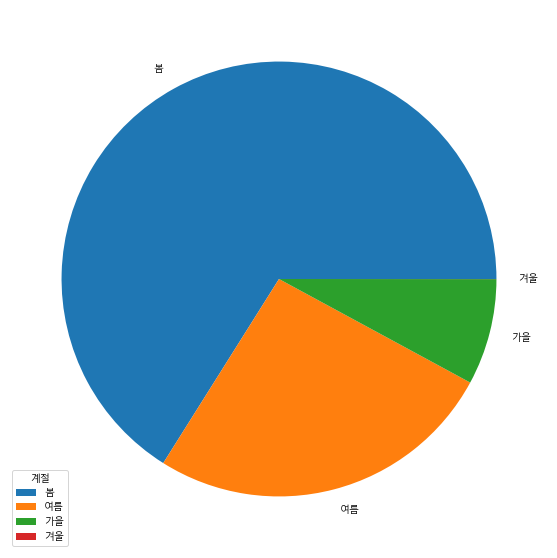

In [53]:
plt.figure(figsize=(10,10))
dat = train['weather'].value_counts() / all_cnt # 비율

dat.index = ['봄', '여름', '가을', '겨울']
plt.pie(dat.values, labels=dat.index)
plt.legend(title="계절")

In [54]:
## 데이터 나누기(입력, 출력)
sel = ['season', 'weather', 'temp', 'atemp', 'humidity']

X = train[sel]
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   stratify=train.holiday,
                                                   test_size=0.3,
                                                   random_state=777)

In [55]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
preds[0:10]

array([ 60.19979878, 199.81480783, 222.04685517, 284.03695325,
       102.00512668, 314.17529869, 254.97051549, 147.06744085,
       170.81657846, 157.16779095])

In [56]:
# 결정계수
print('학습용 데이터 셋 평가 : ', model.score(X_train, y_train))
print('테스트 데이터 셋 평가 : ', model.score(X_test, y_test))

학습용 데이터 셋 평가 :  0.2618516780511595
테스트 데이터 셋 평가 :  0.254814774642517


In [57]:
### MSE로 평가지표로 평가해 보기
np.sum( (preds - y_test) ** 2 ) / len(preds)

24417.548232691486

In [58]:
from sklearn.metrics import mean_squared_error

mean_squared_error(preds, y_test)

24417.548232691486

### 모델 만들기

In [67]:
model = DecisionTreeRegressor(max_depth=4, random_state=77)
model.fit(X_train, y_train)
preds = model.predict(X_test)
preds[0:10]

array([ 97.30449827, 151.00999231, 188.31878173, 195.37788578,
        72.27145923, 322.74324324, 322.74324324, 103.47719298,
       151.00999231,  72.27145923])

In [68]:
# 결정계수
print('학습용 데이터 셋 평가 : ', model.score(X_train, y_train))
print('테스트 데이터 셋 평가 : ', model.score(X_test, y_test))

학습용 데이터 셋 평가 :  0.2808510586326226
테스트 데이터 셋 평가 :  0.27023632929744124


In [69]:
from sklearn.metrics import mean_squared_error

mean_squared_error(preds, y_test)

23912.22882780251

### 3-9 앙상블 학습, 평가

In [70]:
model = RandomForestRegressor(max_depth=4, random_state=77)
model.fit(X_train, y_train)
preds = model.predict(X_test)
preds[0:10]

array([ 96.74657849, 147.65960325, 191.84576188, 226.0605998 ,
        75.09962316, 305.20628663, 263.73999697, 117.87863455,
       151.23855058,  99.69970335])

In [71]:
# 결정계수
print('학습용 데이터 셋 평가 : ', model.score(X_train, y_train))
print('테스트 데이터 셋 평가 : ', model.score(X_test, y_test))

학습용 데이터 셋 평가 :  0.29663071781657724
테스트 데이터 셋 평가 :  0.281670798274279


In [72]:
from sklearn.metrics import mean_squared_error

mean_squared_error(preds, y_test)

23537.554601507683

* 3개 모델 비교 결과 앙상블 모델(RandomForestRegressor)이 가장 좋다.

### 최종 모델

In [74]:
sel

['season', 'weather', 'temp', 'atemp', 'humidity']

In [75]:
test_last = test[sel]

In [81]:
model = RandomForestRegressor(max_depth=4, random_state=77)
model.fit(X_train, y_train)
preds = model.predict(test_last)
preds[0:10]

array([82.64912455, 82.02548106, 82.02548106, 82.02548106, 82.02548106,
       79.8156044 , 74.74280777, 75.33495393, 75.33495393, 80.40775056])

In [83]:
sub['count'] = preds

sub.loc[ sub['count']<0, 'count' ] = 0 #음수 처리
sub.to_csv("baseline_model.csv", index=False)